 Vehicle price prediction 
----------------------------------------------------------------------------------

### Here we are working with 3 different Machine learning techniques for prediction
- Linear regression
- Decision Tree
- Random Forest

In [1]:
# 1. Load the cars dataset.
import pandas as pd
import numpy as np

In [2]:
# 2. Figure out the best strategy to fill missing values
auto_data = pd.read_csv("autos_small.csv")
print(auto_data.shape)
og_row,og_col = auto_data.shape
auto_data.head()

(10000, 11)


,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [3]:
total_null_data = auto_data.isnull().any()
total_null_data

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [4]:
auto_data.dropna(inplace=True)
new_row,new_col = auto_data.shape
print("total dropped rows = "+str(((og_row-new_row)*100/og_row))+"% or ("+str(og_row-new_row)+")")
auto_data.head()

total dropped rows = 19.9% or (1990)


,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [5]:
# 3. Complete any other preprocessing required.
print("unique names:"+str(auto_data.name.unique())+" \ncount:"+str(len(auto_data.name.unique())))
print("-----------------------------------------------------------------------------------------------------------------------")
print("unique gearbox:"+str(auto_data.gearbox.unique())+"\ncount:"+str(len(auto_data.gearbox.unique())))
print("-----------------------------------------------------------------------------------------------------------------------")
print("unique model names:"+str(auto_data.model.unique())+"\ncount:"+str(len(auto_data.model.unique())))
print("-----------------------------------------------------------------------------------------------------------------------")
print("unique brand names:"+str(auto_data.brand.unique())+"\ncount:"+str(len(auto_data.brand.unique())))
print("-----------------------------------------------------------------------------------------------------------------------")
print("unique vehicle type names:"+str(auto_data.vehicleType.unique())+"\ncount:"+str(len(auto_data.vehicleType.unique())))

unique names:['Ford_Escort'
 'Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Winterreifen_Neu!!'
 'A3_Limousine' ... 'Opel_Corsa_C_1.2_Twinport'
 'Volkswagen_Touran_2.0_TDI_DPF' 'Renault_Megane_1.6_16V_100_Authentique'] 
count:7013
-----------------------------------------------------------------------------------------------------------------------
unique gearbox:['manuell' 'automatik']
count:2
-----------------------------------------------------------------------------------------------------------------------
unique model names:['escort' 'c_klasse' 'a3' 'fortwo' '3er' 'yaris' 'a4' 'golf' 'transporter'
 'slk' 'andere' 'zafira' 'corsa' 'arosa' 'passat' '2_reihe' 'rav' 'mondeo'
 'x_reihe' 'kalos' 'a2' 'twingo' 'ka' 'fiesta' '911' '5er' 'superb'
 'i_reihe' 'polo' 'touran' 'octavia' 'omega' 'lupo' 'e_klasse' 'm_klasse'
 'almera' 'meriva' 'santa' 'a_klasse' 'citigo' 'caddy' 'signum' 's_klasse'
 'leon' '6_reihe' '80' 'a8' 'a6' 'vito' 'astra' 'sprinter' 'clio' 'cooper'
 'seicento' 'bora' 'eos'

Dropping "name" col as out of 8000 rows 7000 have unique value, hence it may contribute very little to assessment
---------------------------------------------------------------------------------------------------------------------------------

In [6]:
auto_data.drop('name',axis=1,inplace = True)
auto_data.head()

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,2200,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [7]:
import copy
auto_data_bkp = copy.deepcopy(auto_data)

Converting categorial variable to numerical 
---------------------------------------------------------------

In [8]:
auto_data_df = pd.get_dummies(auto_data_bkp,columns=['gearbox','model','fuelType','brand','vehicleType'])
auto_data_df.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox_automatik,gearbox_manuell,model_100,model_145,model_147,...,brand_volkswagen,brand_volvo,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
0,400,1992,8,89,60000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2200,1998,0,150,150000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4000,2006,7,0,150000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2600,2002,7,41,150000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2222,2001,10,143,150000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# MODEL 1:
Dividing data into features and target for analysis
------------------------------------

In [9]:
y = auto_data_df['price']
y = list(y)
auto_data_df.drop('price',axis=1,inplace=True)

col = []
for i in auto_data_df.columns:
    col.append(str(i))
X = auto_data_df.values

In [10]:
X

array([[1992,    8,   89, ...,    1,    0,    0],
       [1998,    0,  150, ...,    1,    0,    0],
       [2006,    7,    0, ...,    0,    1,    0],
       ...,
       [2011,    6,  140, ...,    0,    0,    0],
       [2002,   10,   58, ...,    0,    0,    0],
       [2012,    4,  101, ...,    0,    1,    0]], dtype=int64)

In [11]:
y

[400,
 2200,
 4000,
 2600,
 2222,
 4000,
 570,
 9999,
 16999,
 11300,
 11980,
 3999,
 3450,
 500,
 12250,
 2800,
 7399,
 2200,
 5500,
 5000,
 17800,
 19800,
 5299,
 1000,
 7800,
 299,
 1700,
 750,
 4200,
 9300,
 10500,
 5350,
 1400,
 780,
 900,
 350,
 690,
 119900,
 1200,
 10900,
 5200,
 600,
 7450,
 25000,
 300,
 7990,
 11990,
 590,
 2400,
 5000,
 6990,
 500,
 1150,
 690,
 2300,
 130,
 0,
 1550,
 6850,
 19500,
 27500,
 1900,
 4300,
 2850,
 8890,
 650,
 890,
 1200,
 500,
 36900,
 6199,
 62500,
 500,
 11500,
 8490,
 850,
 5650,
 4750,
 3900,
 23500,
 4000,
 1500,
 950,
 5700,
 1190,
 3600,
 9000,
 1790,
 12999,
 7800,
 3790,
 1800,
 1100,
 2150,
 1000,
 799,
 130,
 11800,
 550,
 1499,
 799,
 1899,
 2100,
 8299,
 8450,
 7590,
 999,
 80,
 5750,
 14500,
 9500,
 3890,
 400,
 17999,
 7200,
 5200,
 2500,
 1200,
 11450,
 1,
 900,
 1250,
 4950,
 12200,
 1700,
 2000,
 2400,
 22890,
 4999,
 7850,
 1500,
 13799,
 1290,
 10900,
 2200,
 1400,
 8100,
 14890,
 1450,
 1800,
 2850,
 18700,
 2500,
 12500

Train Test split and checking performance of various regression models
--------------------------------------------------------------------------

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
# 4. Apply various regression models and find out which model is the best for this dataset

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2=lr.score(X_train, y_train)
adj_r2 = 1 - float(len(y_train)-1)/(len(y_train)-len(lr.coef_)-1)*(1 - r2)
r2,adj_r2

print("Mean Square Error: "+str(sqrt(mean_squared_error(y_test, y_pred))))
r2,adj_r2

# need to get suggestion over poor predection rate for linear regression model

Mean Square Error: 37197028.433868706


(0.6824580507718431, 0.6671861166849662)

In [14]:
# 5. Apply RandomForestRegressor and compare the results with DecisionTree.
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Mean Square Error for dt: "+str(sqrt(mean_squared_error(y_test, y_pred_dt))))

rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Mean Square Error rf: "+str(sqrt(mean_squared_error(y_test, y_pred_rf))))


Mean Square Error for dt: 308430.32651391695
Mean Square Error rf: 308437.05977406556


# <font color='red' >Above models are made on raw dataset </font>
where,
 1.  first data is cleaned
 2.  categorial data is converted to numeric 
 3. then model performace is verefied on linear regressor, decision tree in random forest
## error rates of predictions are found to be as follows:
### Liner regression model: Mean Square Error: 37197028.433868706
> r2 and adj r2 :(0.6824580507718431, 0.6671861166849662)
### Decision tree: Mean Square Error for dt: 308430.4049260048
### Random forest: Mean Square Error rf: 308456.34159960755

# MODEL 2:
Removing outliners and Checking feature importance in given Data Sample
---------------------------------------------------------------

In [15]:
auto_data.shape
import copy 

auto_data_bkp = copy.deepcopy(auto_data)

Checking pairwise dependency of features
------------------------

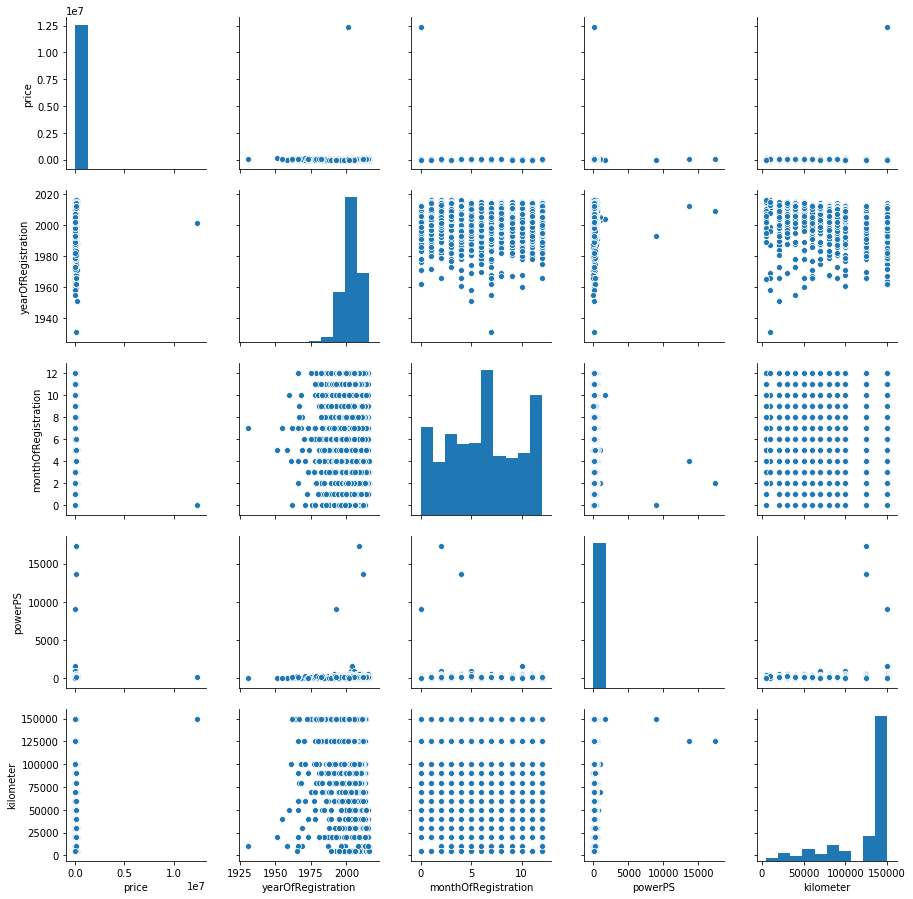

In [17]:
import seaborn as sns

sns.pairplot(auto_data_bkp)
print(" ")


In [18]:
auto_data_bkp.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000
mean,7.936714e+03,2003.063670,6.138951,126.574157,124970.037453
std,1.381476e+05,6.476747,3.523610,272.938251,39406.878667
min,0.000000e+00,1931.000000,0.000000,0.000000,5000.000000
25%,1.450000e+03,1999.000000,3.000000,75.000000,100000.000000
50%,3.500000e+03,2003.000000,6.000000,114.000000,150000.000000
75%,8.249750e+03,2008.000000,9.000000,150.000000,150000.000000
max,1.234568e+07,2016.000000,12.000000,17322.000000,150000.000000


Removing outliners with IQR more than 1.5
--------------------

In [19]:
quartile1 = auto_data_bkp['price'].quantile(0.25)
quartile3 = auto_data_bkp['price'].quantile(0.75)
iqr = quartile3-quartile1

In [20]:
#auto_data_new = auto_data[~((auto_data['price'] < (quartile1 - 1.5 * iqr)) |(auto_data['price'] > (quartile1 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['yearOfRegistration'] < (quartile1 - 1.5 * iqr)) |(auto_data['yearOfRegistration'] > (quartile3 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['monthOfRegistration'] < (quartile1 - 1.5 * iqr)) |(auto_data['monthOfRegistration'] > (quartile3 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['powerPS'] < (quartile1 - 1.5 * iqr)) |(auto_data['powerPS'] > (quartile3 + 1.5 * iqr)))] 
auto_data_new= auto_data_bkp[~((auto_data_bkp['kilometer'] < (quartile1 - 1.5 * iqr)) |(auto_data_bkp['kilometer'] > (quartile3 + 1.5 * iqr)))] 
print(auto_data_new.shape)
auto_data_new.head()

(108, 10)


,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
73,27500,1931,7,manuell,39,andere,10000,benzin,ford,cabrio
114,799,1998,4,manuell,75,astra,5000,benzin,opel,cabrio
140,1,1995,3,manuell,75,transporter,5000,diesel,volkswagen,bus
221,48999,2015,7,automatik,231,x_reihe,5000,diesel,bmw,limousine
420,27999,2015,8,automatik,280,leon,10000,benzin,seat,limousine


Converting categorial variable to numerical 
---------------------------------------------------------------

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
auto_data_new_bkp = copy.deepcopy(auto_data_new)
auto_data_new_bkp = auto_data_new_bkp.apply(LabelEncoder().fit_transform)
auto_data_new_bkp.head()


,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
73,70,0,7,1,4,13,1,1,6,2
114,15,12,4,1,13,14,0,1,13,2
140,1,9,3,1,13,46,0,2,22,1
221,88,28,7,0,48,50,0,2,1,6
420,71,28,8,0,50,31,1,1,17,6


Dividing data into features and target for analysis
------------------------------------

In [22]:
y = auto_data_new_bkp['price']
y = list(y)
auto_data_new_bkp.drop('price',axis=1,inplace=True)

col = []
for i in auto_data_new_bkp.columns:
    col.append(str(i))
X = auto_data_new_bkp.values

In [23]:
X

array([[ 0,  7,  1,  4, 13,  1,  1,  6,  2],
       [12,  4,  1, 13, 14,  0,  1, 13,  2],
       [ 9,  3,  1, 13, 46,  0,  2, 22,  1],
       [28,  7,  0, 48, 50,  0,  2,  1,  6],
       [28,  8,  0, 50, 31,  1,  1, 17,  6],
       [10,  8,  1,  0, 39,  0,  2, 22,  4],
       [28,  3,  1, 10, 48,  1,  1, 22,  4],
       [28,  3,  1, 25, 13,  1,  1, 13,  7],
       [19,  8,  1,  0, 14,  0,  1, 13,  5],
       [13, 12,  1,  0, 21,  1,  1, 13,  4],
       [27,  6,  1, 23, 28,  1,  1, 22,  6],
       [ 8, 11,  0, 25,  5,  0,  2,  1,  5],
       [25,  2,  0, 53,  7,  1,  1, 15,  2],
       [23,  8,  0, 31, 14,  0,  1, 13,  4],
       [27,  7,  1, 16, 28,  0,  1, 22,  6],
       [24,  6,  0, 36, 10,  0,  2,  0,  3],
       [ 4,  8,  1,  0, 13,  1,  1,  3,  2],
       [ 3, 12,  1,  0, 13,  1,  1, 16,  5],
       [28,  8,  1, 30, 13,  1,  2, 13,  7],
       [28,  8,  1, 17, 13,  0,  1, 13,  4],
       [28,  8,  1, 29, 28,  1,  1, 22,  1],
       [29,  3,  0, 44,  9,  1,  2,  0,  5],
       [27

In [24]:
y

[70,
 15,
 1,
 88,
 71,
 6,
 42,
 62,
 24,
 5,
 59,
 17,
 90,
 34,
 53,
 46,
 25,
 28,
 65,
 52,
 68,
 83,
 67,
 19,
 16,
 45,
 60,
 44,
 74,
 47,
 0,
 39,
 36,
 61,
 48,
 15,
 3,
 72,
 14,
 50,
 0,
 56,
 55,
 29,
 0,
 43,
 59,
 80,
 37,
 18,
 51,
 19,
 9,
 85,
 24,
 7,
 2,
 41,
 26,
 87,
 1,
 75,
 89,
 32,
 25,
 82,
 55,
 8,
 13,
 69,
 28,
 76,
 58,
 21,
 30,
 91,
 35,
 81,
 24,
 10,
 78,
 79,
 4,
 12,
 49,
 0,
 73,
 86,
 20,
 84,
 63,
 77,
 11,
 38,
 66,
 0,
 64,
 23,
 19,
 31,
 22,
 27,
 57,
 40,
 33,
 54,
 85,
 14]

Checking feature importance
------------

In [25]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
importances = model.feature_importances_
feature_names = auto_data_new_bkp.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features

[('gearbox', 0.16508246367065194),
 ('model', 0.16172935016241258),
 ('monthOfRegistration', 0.15884602410074322),
 ('kilometer', 0.13176186839116974),
 ('vehicleType', 0.12045890234630759),
 ('brand', 0.05767121200559313),
 ('fuelType', 0.036443725215343635),
 ('powerPS', 0.033463094484662795)]

Since model, kilometer. vehicle type, fueltype and brand has very less feature importance we can drop them
-----------

In [27]:
auto_data_new.drop(['powerPS','fuelType','brand'],axis = 1,inplace= True)

c:\users\punitha.hs\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
auto_data_new.head()

,price,yearOfRegistration,monthOfRegistration,gearbox,model,kilometer,vehicleType
73,27500,1931,7,manuell,andere,10000,cabrio
114,799,1998,4,manuell,astra,5000,cabrio
140,1,1995,3,manuell,transporter,5000,bus
221,48999,2015,7,automatik,x_reihe,5000,limousine
420,27999,2015,8,automatik,leon,10000,limousine


In [29]:
auto_data_df = pd.get_dummies(auto_data_new,columns=['gearbox','model','vehicleType'])
auto_data_df.head()

,price,yearOfRegistration,monthOfRegistration,kilometer,gearbox_automatik,gearbox_manuell,model_1_reihe,model_2_reihe,model_3er,model_4_reihe,...,model_z_reihe,model_zafira,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
73,27500,1931,7,10000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
114,799,1998,4,5000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
140,1,1995,3,5000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
221,48999,2015,7,5000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
420,27999,2015,8,10000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Dividing data into features and target for analysis
---------

In [30]:
y = auto_data_df['price']
y = list(y)
auto_data_df.drop('price',axis=1,inplace=True)
col = []
for i in auto_data_df.columns:
    col.append(str(i))
X = auto_data_df.values

X

array([[ 1931,     7, 10000, ...,     0,     0,     0],
       [ 1998,     4,  5000, ...,     0,     0,     0],
       [ 1995,     3,  5000, ...,     0,     0,     0],
       ...,
       [ 2016,     4,  5000, ...,     0,     0,     0],
       [ 2015,     6, 10000, ...,     0,     0,     0],
       [ 1995,     7,  5000, ...,     0,     0,     0]], dtype=int64)

In [31]:
y

[27500,
 799,
 1,
 48999,
 27999,
 200,
 8450,
 18699,
 2200,
 120,
 16500,
 950,
 95000,
 4500,
 13879,
 11000,
 2500,
 2800,
 20900,
 13290,
 22650,
 43000,
 21900,
 1200,
 900,
 9500,
 17999,
 8620,
 33700,
 11400,
 0,
 7470,
 5799,
 18500,
 11500,
 799,
 100,
 28888,
 750,
 12800,
 0,
 15499,
 15000,
 2999,
 0,
 8500,
 16500,
 39500,
 6690,
 990,
 12900,
 1200,
 400,
 45900,
 2200,
 230,
 9,
 8000,
 2550,
 48000,
 1,
 33900,
 49900,
 4000,
 2500,
 39900,
 15000,
 300,
 749,
 24500,
 2800,
 33990,
 15975,
 1700,
 3200,
 175000,
 5699,
 39850,
 2200,
 489,
 35800,
 37900,
 101,
 650,
 12300,
 0,
 28899,
 46800,
 1500,
 43490,
 20680,
 35499,
 500,
 6990,
 20999,
 0,
 20700,
 1900,
 1200,
 3998,
 1750,
 2700,
 15950,
 7800,
 4300,
 14900,
 45900,
 750]

Train Test split and checking performance of various regression models
--------

In [32]:

from sklearn.model_selection import train_test_split 

# 4. Apply various regression models and find out which model is the best for this dataset

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2=lr.score(X_train, y_train)
adj_r2 = 1 - float(len(y_train)-1)/(len(y_train)-len(lr.coef_)-1)*(1 - r2)
r2,adj_r2

print("Mean Square Error: "+str(sqrt(mean_squared_error(y_test, y_pred))))
r2,adj_r2

# need to get suggestion over poor predection rate for linear regression model

Mean Square Error: 35720.065778986114


(0.9517651830306465, 0.7722244754224974)

In [33]:
# 5. Apply RandomForestRegressor and compare the results with DecisionTree.
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Mean Square Error for dt: "+str(sqrt(mean_squared_error(y_test, y_pred_dt))))

rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Mean Square Error rf: "+str(sqrt(mean_squared_error(y_test, y_pred_rf))))


Mean Square Error for dt: 30552.764848105588
Mean Square Error rf: 30423.319639710586


# <font color='red' >Above models are made on raw dataset </font>
where,
 1.  first data is cleaned
 2.  outliners are removed
 3.  feature importance is checked
 4.  less important featues are dropped
 5.  categorial data is converted to numeric 
 6.  then model performace is verefied on linear regressor, decision tree in random forest
## error rates of predictions are found to be as follows:
### Liner regression model: Mean Square Error: 35720.065778986114
> r2 and adj r2 :(0.9517651830306465, 0.7722244754224974)
### Decision tree: Mean Square Error for dt: 30118.43588160822
### Random forest: Mean Square Error rf: Mean Square Error rf: 29623.942294244487

# MODEL 3:

In previous examples while cleaning data null were being dropped hence some data rows were reduced lets check MODEL 2 performance by filling null data instead of dropping it
-------------

In [34]:
auto_data = pd.read_csv("C:/digital vidya/Class room notes/datasets/autos_small.csv")
print(auto_data.shape)
og_row,og_col = auto_data.shape
auto_data.head()

(10000, 11)


,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


# Dropping name column

In [35]:
auto_data.drop('name',axis = 1,inplace=True)

In [36]:
total_null_data = auto_data.isnull().any()
total_null_data

price                  False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [37]:
auto_data_bkp = copy.deepcopy(auto_data)

#Filling the missing values with mean for continuous data

auto_data_bkp=auto_data_bkp.fillna(auto_data_bkp.mean())

#Filling the missing values with mode for categorical value data
auto_data_bkp['gearbox'] = auto_data_bkp['gearbox'].fillna(auto_data_bkp['gearbox'].mode().iloc[0])
auto_data_bkp['model'] = auto_data_bkp['model'].fillna(auto_data_bkp['model'].mode().iloc[0])
auto_data_bkp['fuelType'] = auto_data_bkp['fuelType'].fillna(auto_data_bkp['fuelType'].mode().iloc[0])
auto_data_bkp['vehicleType'] = auto_data_bkp['vehicleType'].fillna(auto_data_bkp['vehicleType'].mode().iloc[0])
auto_data_bkp.isnull().any()


price                  False
yearOfRegistration     False
monthOfRegistration    False
gearbox                False
powerPS                False
model                  False
kilometer              False
fuelType               False
brand                  False
vehicleType            False
dtype: bool

In [38]:
auto_data_bkp.shape

(10000, 10)

Checking pairwise dependency of features
------------------------

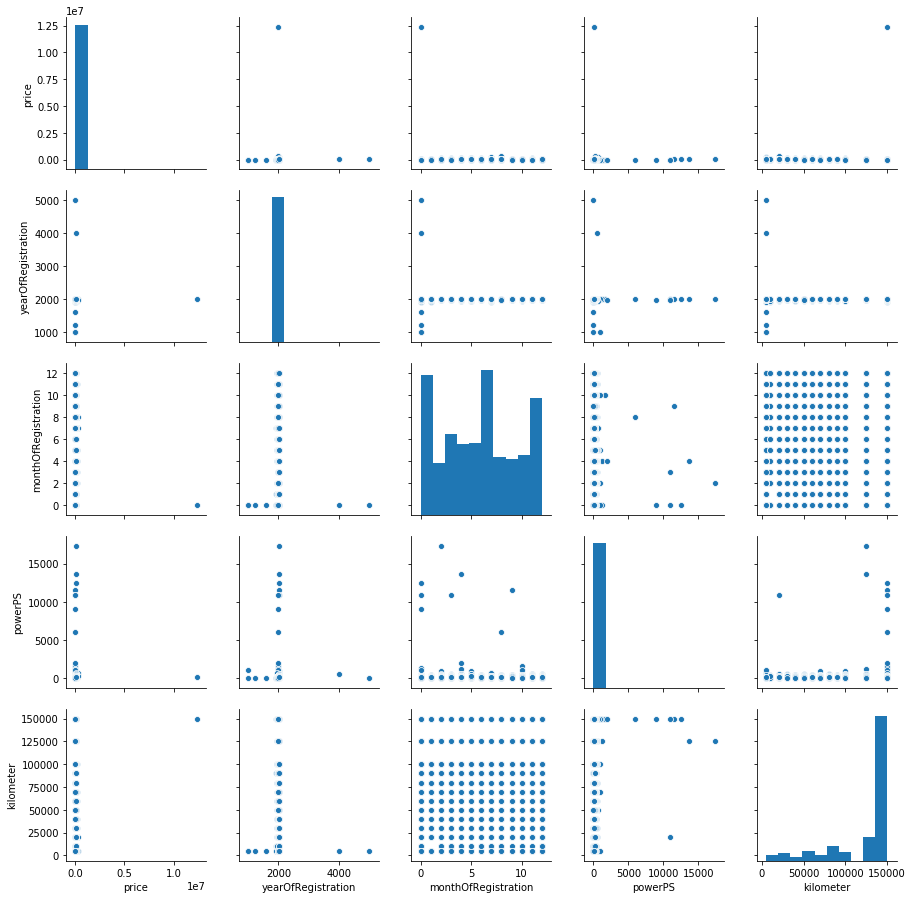

In [39]:
import seaborn as sns

sns.pairplot(auto_data_bkp)

In [40]:
auto_data_bkp.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


Removing outliners with IQR more than 1.5
--------------------

In [41]:
quartile1 = auto_data_bkp['price'].quantile(0.25)
quartile3 = auto_data_bkp['price'].quantile(0.75)
iqr = quartile3-quartile1

In [42]:
#auto_data_new = auto_data[~((auto_data['price'] < (quartile1 - 1.5 * iqr)) |(auto_data['price'] > (quartile1 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['yearOfRegistration'] < (quartile1 - 1.5 * iqr)) |(auto_data['yearOfRegistration'] > (quartile3 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['monthOfRegistration'] < (quartile1 - 1.5 * iqr)) |(auto_data['monthOfRegistration'] > (quartile3 + 1.5 * iqr)))]
#auto_data_new = auto_data[~((auto_data['powerPS'] < (quartile1 - 1.5 * iqr)) |(auto_data['powerPS'] > (quartile3 + 1.5 * iqr)))] 
auto_data_new= auto_data_bkp[~((auto_data_bkp['kilometer'] < (quartile1 - 1.5 * iqr)) |(auto_data_bkp['kilometer'] > (quartile3 + 1.5 * iqr)))] 
print(auto_data_new.shape)
auto_data_new.head()

(241, 10)


,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
22,1000,1999,0,manuell,0,mx_reihe,5000,benzin,mazda,limousine
73,27500,1931,7,manuell,39,andere,10000,benzin,ford,cabrio
79,150,2000,1,manuell,0,golf,5000,benzin,sonstige_autos,limousine
114,799,1998,4,manuell,75,astra,5000,benzin,opel,cabrio
140,1,1995,3,manuell,75,transporter,5000,diesel,volkswagen,bus


Converting categorial variable to numerical 
---------------------------------------------------------------

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
auto_data_new_bkp = copy.deepcopy(auto_data_new)
auto_data_new_bkp = auto_data_new_bkp.apply(LabelEncoder().fit_transform)
auto_data_new_bkp.head()


,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
22,43,32,0,1,0,49,0,1,14,6
73,125,4,7,1,9,16,1,1,8,2
79,15,33,1,1,0,36,0,1,26,6
114,36,31,4,1,20,17,0,1,19,2
140,1,28,3,1,20,65,0,2,31,1


Dividing data into features and target for analysis
------------------------------------

In [44]:
y = auto_data_new_bkp['price']
y = list(y)
auto_data_new_bkp.drop('price',axis=1,inplace=True)

col = []
for i in auto_data_new_bkp.columns:
    col.append(str(i))
X = auto_data_new_bkp.values

In [45]:
X

array([[32,  0,  1, ...,  1, 14,  6],
       [ 4,  7,  1, ...,  1,  8,  2],
       [33,  1,  1, ...,  1, 26,  6],
       ...,
       [48,  0,  1, ...,  1, 31,  6],
       [33,  0,  1, ...,  1, 31,  6],
       [38,  3,  1, ...,  1,  8,  6]], dtype=int64)

In [46]:
y

[43,
 125,
 15,
 36,
 1,
 145,
 71,
 1,
 59,
 127,
 0,
 18,
 92,
 116,
 58,
 13,
 126,
 113,
 40,
 101,
 123,
 148,
 56,
 0,
 7,
 78,
 58,
 44,
 107,
 6,
 88,
 98,
 21,
 0,
 75,
 61,
 24,
 64,
 119,
 106,
 122,
 140,
 0,
 121,
 20,
 37,
 44,
 39,
 53,
 9,
 0,
 0,
 61,
 105,
 9,
 95,
 30,
 0,
 45,
 63,
 20,
 9,
 49,
 114,
 94,
 131,
 54,
 99,
 15,
 0,
 31,
 0,
 89,
 83,
 14,
 115,
 100,
 36,
 11,
 33,
 0,
 129,
 35,
 101,
 11,
 46,
 28,
 15,
 103,
 4,
 57,
 21,
 70,
 0,
 110,
 109,
 0,
 23,
 147,
 72,
 48,
 100,
 66,
 0,
 9,
 93,
 93,
 113,
 1,
 3,
 0,
 0,
 150,
 0,
 137,
 85,
 0,
 97,
 20,
 80,
 13,
 65,
 41,
 104,
 44,
 26,
 31,
 77,
 87,
 142,
 55,
 38,
 1,
 58,
 19,
 25,
 2,
 91,
 1,
 0,
 79,
 62,
 61,
 49,
 144,
 1,
 47,
 132,
 146,
 75,
 61,
 139,
 82,
 109,
 23,
 34,
 27,
 0,
 124,
 64,
 32,
 133,
 112,
 50,
 68,
 42,
 149,
 81,
 138,
 0,
 58,
 22,
 0,
 29,
 61,
 37,
 20,
 17,
 135,
 0,
 87,
 0,
 136,
 12,
 3,
 0,
 32,
 102,
 1,
 0,
 0,
 52,
 8,
 96,
 0,
 130,
 143,
 48,
 23,
 18

Checking feature importance
------------

In [47]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
importances = model.feature_importances_
feature_names = auto_data_new_bkp.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features

[('monthOfRegistration', 0.21710168186518283),
 ('kilometer', 0.17380332648923763),
 ('vehicleType', 0.14710743058740938),
 ('model', 0.13890913146123374),
 ('gearbox', 0.12131009795453962),
 ('brand', 0.042038845468755706),
 ('powerPS', 0.0345739232614644),
 ('fuelType', 0.028574334720876237)]

Since model, fueltype and brand,powerps has very less feature importance we can drop them
-----------

In [49]:
auto_data_new.drop(['model','powerPS','fuelType','brand'],axis = 1,inplace= True)

c:\users\punitha.hs\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
auto_data_new.head()

,price,yearOfRegistration,monthOfRegistration,gearbox,kilometer,vehicleType
22,1000,1999,0,manuell,5000,limousine
73,27500,1931,7,manuell,10000,cabrio
79,150,2000,1,manuell,5000,limousine
114,799,1998,4,manuell,5000,cabrio
140,1,1995,3,manuell,5000,bus


In [51]:
auto_data_df = pd.get_dummies(auto_data_new,columns=['vehicleType','gearbox'])
auto_data_df.head()

,price,yearOfRegistration,monthOfRegistration,kilometer,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_automatik,gearbox_manuell
22,1000,1999,0,5000,0,0,0,0,0,0,1,0,0,1
73,27500,1931,7,10000,0,0,1,0,0,0,0,0,0,1
79,150,2000,1,5000,0,0,0,0,0,0,1,0,0,1
114,799,1998,4,5000,0,0,1,0,0,0,0,0,0,1
140,1,1995,3,5000,0,1,0,0,0,0,0,0,0,1


Dividing data into features and target for analysis
---------

In [52]:
y = auto_data_df['price']
y = list(y)
auto_data_df.drop('price',axis=1,inplace=True)
col = []
for i in auto_data_df.columns:
    col.append(str(i))
X = auto_data_df.values

X

array([[ 1999,     0,  5000, ...,     0,     0,     1],
       [ 1931,     7, 10000, ...,     0,     0,     1],
       [ 2000,     1,  5000, ...,     0,     0,     1],
       ...,
       [ 2015,     0,  5000, ...,     0,     0,     1],
       [ 2000,     0,  5000, ...,     0,     0,     1],
       [ 2005,     3,  5000, ...,     0,     0,     1]], dtype=int64)

In [53]:
y

[1000,
 27500,
 150,
 799,
 1,
 48999,
 3500,
 1,
 2250,
 27999,
 0,
 200,
 8450,
 18699,
 2200,
 120,
 27900,
 16500,
 950,
 12000,
 23500,
 95000,
 1999,
 0,
 40,
 4500,
 2200,
 1200,
 13879,
 35,
 7200,
 11000,
 280,
 0,
 4000,
 2500,
 350,
 2800,
 20900,
 13290,
 22650,
 43000,
 0,
 21900,
 250,
 800,
 1200,
 900,
 1850,
 50,
 0,
 0,
 2500,
 12999,
 50,
 9500,
 490,
 0,
 1250,
 2700,
 250,
 50,
 1600,
 17999,
 8620,
 33700,
 1900,
 11400,
 150,
 0,
 500,
 0,
 7470,
 5799,
 140,
 18500,
 11500,
 799,
 100,
 690,
 0,
 28888,
 750,
 12000,
 100,
 1290,
 444,
 150,
 12800,
 15,
 2000,
 280,
 3450,
 0,
 15499,
 15000,
 0,
 300,
 50000,
 3600,
 1500,
 11500,
 2999,
 0,
 50,
 8500,
 8500,
 16500,
 1,
 10,
 0,
 0,
 238000,
 0,
 39500,
 6690,
 0,
 10500,
 250,
 5500,
 120,
 2900,
 990,
 12900,
 1200,
 400,
 500,
 4400,
 7000,
 45900,
 1950,
 850,
 1,
 2200,
 230,
 399,
 9,
 8000,
 1,
 0,
 4900,
 2550,
 2500,
 1600,
 48000,
 1,
 1300,
 33900,
 49900,
 4000,
 2500,
 39900,
 5750,
 15000,
 300

Train Test split and checking performance of various regression models
--------

In [54]:

from sklearn.model_selection import train_test_split 

# 4. Apply various regression models and find out which model is the best for this dataset

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2=lr.score(X_train, y_train)
adj_r2 = 1 - float(len(y_train)-1)/(len(y_train)-len(lr.coef_)-1)*(1 - r2)
r2,adj_r2

print("Mean Square Error: "+str(sqrt(mean_squared_error(y_test, y_pred))))
r2,adj_r2

# need to get suggestion over poor predection rate for linear regression model

Mean Square Error: 20895.355409815522


(0.29355928749422633, 0.2419653028730181)

In [55]:
# 5. Apply RandomForestRegressor and compare the results with DecisionTree.
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Mean Square Error for dt: "+str(sqrt(mean_squared_error(y_test, y_pred_dt))))

rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Mean Square Error rf: "+str(sqrt(mean_squared_error(y_test, y_pred_rf))))


Mean Square Error for dt: 30059.084309598213
Mean Square Error rf: 15564.783261830182


# <font color='red' >Above models are made on raw dataset </font>
where,
 1.  first data is cleaned
 2.  missing values are filled with mean and mode 
 3.  outliners are removed
 4.  feature importance is checked
 5.  less important featues are dropped
 6.  categorial data is converted to numeric 
 7.  then model performace is verefied on linear regressor, decision tree in random forest
## error rates of predictions are found to be as follows:
### Liner regression model: Mean Square Error: 20895.355409815522
> r2 and adj r2 :(0.29355928749422633, 0.2419653028730181)
### Decision tree: Mean Square Error for dt: Mean Square Error for dt: 29858.802453549688
### Random forest: Mean Square Error rf: Mean Square Error rf: 17625.328526412137